<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#逻辑斯蒂回归" data-toc-modified-id="逻辑斯蒂回归-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>逻辑斯蒂回归</a></span><ul class="toc-item"><li><span><a href="#加载数据集" data-toc-modified-id="加载数据集-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>加载数据集</a></span></li><li><span><a href="#可视化" data-toc-modified-id="可视化-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>可视化</a></span></li></ul></li><li><span><a href="#多元逻辑斯蒂回归" data-toc-modified-id="多元逻辑斯蒂回归-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>多元逻辑斯蒂回归</a></span><ul class="toc-item"><li><span><a href="#使用全数据集验证" data-toc-modified-id="使用全数据集验证-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>使用全数据集验证</a></span></li></ul></li><li><span><a href="#使用鸢尾花的数据进行训练与测试" data-toc-modified-id="使用鸢尾花的数据进行训练与测试-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>使用鸢尾花的数据进行训练与测试</a></span></li><li><span><a href="#最大熵模型" data-toc-modified-id="最大熵模型-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>最大熵模型</a></span></li></ul></div>

# 逻辑斯蒂回归

In [1]:
import numpy as np

In [2]:
class BinLogisticRegression:
    def __init__(self, max_step=80, learning_rate=0.01):
        self.max_step = max_step
        self.learning_rate = learning_rate
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def fit(self, X, Y):
        # 初始化参数全部为0 
        self.weights = np.zeros((1, len(X[0])), dtype=np.float32)
        
        self.paras = []
        for step in range(self.max_step):
            results = self.sigmoid(np.dot(X, np.transpose(self.weights)))
            # 迭代减少
            self.weights = self.weights + np.sum(self.learning_rate * (Y - results) * X, axis=0)
            self.paras.append(self.weights)
        print("Weights:", self.weights)
        print('Binomial logistic regression model training completed!')
        
    def predict(self, X):
        return [[1] if z >=0 else [0] for z in np.dot(X, np.transpose(self.weights))]

## 加载数据集

In [3]:
iris_npz = np.load('iris.npz')
data = iris_npz['data']
X = iris_npz['X']
Y = iris_npz['Y']

from sklearn.model_selection import train_test_split
X = np.insert(X, 0, values=1, axis=1)
Y = Y.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [4]:
blr = BinLogisticRegression()
blr.fit(X_train, Y_train)

Weights: [[-0.7820519   3.94880647 -6.79000572]]
Binomial logistic regression model training completed!


In [5]:
from collections import Counter

results = blr.predict(X_test)
scores = (results == Y_test)
scores = [score[0] for score in scores]
print("Accuracy = {:3.2f}%".format(Counter(scores)[True]/len(Y_test)*100))

Accuracy = 96.67%


In [6]:
XSAMPLES = [(1, 5.5, 2.8), (1, 5.5, 3.5),  (1, 4.5, 3.5), (1, 6.5, 2.5)]
results = blr.predict(XSAMPLES)
print(results)

[[1], [0], [0], [1]]


## 可视化

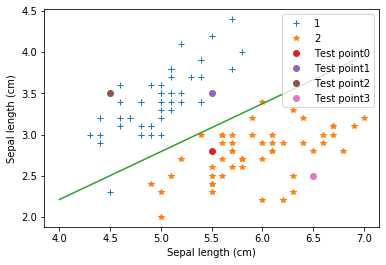

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data[:50, 0],data[:50, 1], '+', label='1')
plt.plot(data[50:100, 0], data[50:100, 1], '*', label='2')

# 绘制决策面
x_points = np.arange(4, 8)
y_points = -(blr.weights[0][1] * x_points + blr.weights[0][0])/blr.weights[0][2]
plt.plot(x_points, y_points)

for i, point in enumerate(XSAMPLES):
    plt.plot(point[1], point[2], 'o', label="Test point{0}".format(i))
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal length (cm)")
plt.legend()

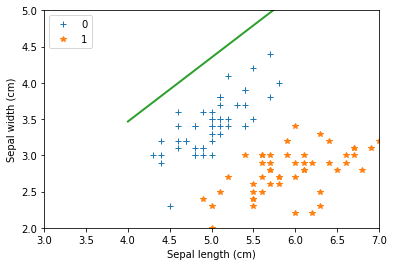

In [8]:
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

fig = plt.figure()
ax = plt.axes(xlim=(3, 7), ylim=(2, 5))
ax.plot(data[:50, 0], data[:50, 1], '+', label='0')
ax.plot(data[50:100, 0], data[50:100, 1], '*', label='1')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.legend(loc='upper left')

line, = ax.plot([], [], lw=2)
def update(para):
    b = para[0][0]
    w0 = para[0][1]
    w1 = para[0][2]
    
    X_points = np.linspace(4, 7, 10)
    Y_points = -(w0 * X_points + b) / w1
    line.set_data(X_points, Y_points)
ani = animation.FuncAnimation(fig, update, blr.paras)
HTML(ani.to_html5_video())

In [9]:
ani.save("Fitting_LoginClassfitic_modex.mp4")

# 多元逻辑斯蒂回归

In [10]:
class MulLogisticRegression:  ## p1 p2 p3
    def __init__(self, max_step=80, learning_rate=0.01):
        self.max_step = max_step
        self.learning_rate = learning_rate
        
    def softmax(self, X):
        Y = np.exp(np.dot(X, np.transpose(self.weights)))
        return Y / np.sum(Y, axis=1).reshape(-1, 1)
        
    def fit(self, X, Y):
        K = len(Y[0])
        self.weights = np.zeros((K, len(X[0])), dtype=np.float32)
        for step in range(self.max_step):
            results = self.softmax(X)
            error = Y - results
            for k in range(K):
                self.weights[k] = self.weights[k] \
                    + np.sum(self.learning_rate * error[:, k].reshape(-1, 1) * X, axis=0)
        print("Weights : ", self.weights)
        print("Multinomial logistic regression model training completed!")
            
    def predict(self, X):
        return np.argmax(self.softmax(X), axis=1)

## 使用全数据集验证

In [11]:
iris_npz_full = np.load('iris_full.npz')
data_full = iris_npz_full['data']
X_full, Y_full = iris_npz_full['X'], iris_npz_full['Y']

In [12]:
from sklearn.preprocessing import OneHotEncoder

X_full_post = np.insert(X_full, 0, values=1, axis= 1)
Y_full_post = Y_full.reshape(-1, 1)

encoder = OneHotEncoder(categories='auto')
encoder.fit(Y_full_post)
Y_full_post = encoder.transform(Y_full_post).toarray()

X_train, X_test, Y_train, Y_test = train_test_split(X_full_post, Y_full_post, test_size=0.3)

In [13]:
mlr = MulLogisticRegression(max_step=280)

mlr.fit(X_train, Y_train)

Weights :  [[ 1.5997815  3.744407   7.71048   -9.950929  -4.8669915]
 [ 3.187053   4.4641795  0.4970635 -3.416679  -5.7191153]
 [-4.7868357 -8.208581  -8.207549  13.367598  10.586106 ]]
Multinomial logistic regression model training completed!


In [14]:
results = mlr.predict(X_test)
print(results)
scores = (results == np.argmax(Y_test, axis = 1))
print("Accuracy = {:3.2f}% ".format(Counter(scores)[True]/len(Y_test) * 100))

[2 1 2 1 2 1 1 0 2 1 1 0 1 0 0 2 1 2 1 0 0 0 1 0 2 2 0 1 2 1 2 2 1 0 1 1 1
 0 2 1 0 0 2 0 2]
Accuracy = 97.78% 


# 使用鸢尾花的数据进行训练与测试

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 200, multi_class='ovr',  solver='liblinear',n_jobs=1)
clf.fit(X_train[:, 1:3], Y_train[:, 0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [16]:
print(clf.score(X_test[:, 1:3], Y_test[:, 0]))
print(clf.predict(X_test[:, 1:3]))
print(Y_test[:, 0])
print(clf.coef_, clf.intercept_)

1.0
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
[[-2.20526389  3.54950703]] [0.70891119]


[4 5 6 7] [[-2.20526389  3.54950703]] [0.70891119]


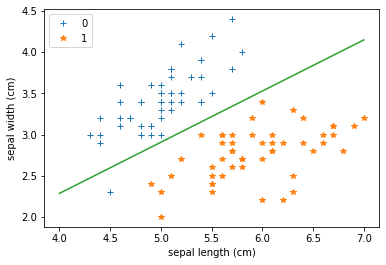

In [17]:
%matplotlib inline

plt.plot(data[:50, 0], data[:50, 1], "+", label='0')
plt.plot(data[50:100, 0], data[50:100, 1],"*", label='1')

x_points = np.arange(4, 8)
print(x_points, clf.coef_, clf.intercept_)
y_points = -(clf.coef_[0][0]*x_points + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_points, y_points)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

In [18]:
clf = LogisticRegression(max_iter = 200, solver='liblinear', multi_class='ovr')
# 去掉 XTRAIN 中附加的 1（第 0 列）
clf.fit(X_train[:, 1:], np.argmax(Y_train, axis = 1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
clf.score(X_test[:, 1:], np.argmax(Y_test, axis = 1))

0.9777777777777777

# 最大熵模型

In [20]:
import math
import copy
class MaximumEntropy:
    def __init__(self, max_step = 1000, threshold = 0.005):
        self.max_step = max_step # 最大迭代步数
        self.threshold = threshold # 收敛阈值，小于该阈值，停止迭代
    
    # 计算样本点 x 的 Zw(x) 值，它是条件分布 Pw(y|x) 的归一化因子
    #x: 向量
    def zwx(self, x):
        zx = 0
        for y in self.labels: # 每个标签类别
            zx_y = 0
            for xi in x: # 每个特征分量
                if (xi, y) in self.x_y:
                    zx_y += self.x_y[(xi, y)][1] #sum wi*fi(xi,y)
                zx += math.exp(zx_y)
        return zx
    
    # 计算样本点 x 的条件分布 Pw(y|x)
    #x: 向量
    #y: 标量
    def pyx(self, x, y):
        zx = self.zwx(x)
        zx_y = 0
        for xi in x : # 每个特征分量
            if (xi, y) in self.x_y :
                zx_y += self.x_y[(xi, y)][1] #sum wi*fi(xi,y)
        return math.exp(zx_y) / zx
    
    def epf(self, xi, y, X):
        ep = 0
        for x in X:
            if xi not in x:
                continue #fi(x, y)=0
            pyx = self.pyx(x, y) # 计算单个样本点的 P(y|x)
            ep += pyx/len(X) # 计算 sum P(x)P(y|x)fi(x,y)，其中 P(x)=1/N， fi(x,y)=1
        return ep
    
    # 优化最大熵模型的对偶函数或对数似然函数
    def fit(self, X, Y):
        N = len(X) # 样例个数
        # 样例的特征分量个数，此处假定所有样例的特征分量个数都一样（常数），
        # 最大熵模型允许样例的维度不一样
        M = len(X[0])
        self.labels = set(Y) # 类别（不重复）
        
        # 统计所有 (x,y) 对的相关信息
        self.x_y = {}
        for i_sample in range(N):
            y = Y[i_sample]
            for xi in X[i_sample]:
                if (xi, y) in self.x_y:
                    self.x_y[(xi, y)][0] += 1
                else:
                    # 分别表示特征 (x,y) 的次数、拉格朗日乘数 w、联合期望 EPF_HAT
                    self.x_y[(xi, y)] = [1, 0, 0]
        
        # 计算所有 (xi,y) 对的联合期望 EPF_HAT: 特征函数 fi(xi,y) 关于经验分布
        # P(xi,y) 的期望， EPF_HAT = sum P(xi,y)fi(xi,y)
        # 从本类 P(xi,y) 的计算公式可以看出， P(xi,y)<=>P(x,y)，此处 x 表示 xi 所在
        # 的样本点
        for x_y in self.x_y: # 遍历每个特征对 (xi,y)
            self.x_y[x_y][2] = self.x_y[x_y][0] / N
            
        # 应用 IIS 算法优化对偶函数或对数似然函数 L(P,w)
        for step in range(self.max_step):
            last_x_y = copy.deepcopy(self.x_y)
            # 计算所有 (x,y) 对的模型期望 EPF: 特征函数 fi(x,y) 关于条件分布
            #Pw(y|x)(即最大熵模型) 的期望， EPF = sum P(x)Pw(y|x)fi(x,y)
            for x_y in self.x_y: # 遍历每个特征对 (x,y)
                ep = self.epf(*x_y, X) # 计算第 i 个特征的模型期望
                self.x_y[x_y][1] += math.log(self.x_y[x_y][2]/ep)/M
                
            # 判断任意权值之差是否小于阈值
            stop = True
            for x_y in self.x_y:
                if abs(last_x_y[x_y][1]-self.x_y[x_y][1]) >= self.threshold:
                    stop = False
                    break
            if stop:
                print('After {} step, maximum entropy model training completed!'.format(step))
                break
        print()
        print(self.x_y)
            
    def predict(self, X):
        results = []
        for x in X:
            zx = self.zwx(x)
            result = []
            for y in self.labels:
                zx_y = 0
                for xi in x:
                    if (xi, y) in self.x_y:
                        zx_y += self.x_y[(xi, y)][1]
                result.append((y, math.exp(zx_y)/zx))
            results.append(result)
        return results

In [21]:
import pandas as pd
dataset = [['sunny', 'hot', 'high', 'false', 'no'],
        ['sunny', 'hot', 'high', 'true', 'no'],
        ['overcast', 'hot', 'high', 'false', 'yes'],
        ['rainy', 'mild', 'high', 'false', 'yes'],
        ['rainy', 'cool', 'normal', 'false', 'yes'],
        ['rainy', 'cool', 'normal', 'true', 'no'],
        ['overcast', 'cool', 'normal', 'true', 'yes'],
        ['sunny', 'mild', 'high', 'false', 'no'],
        ['sunny', 'cool', 'normal', 'false', 'yes'],
        ['rainy', 'mild', 'normal', 'false', 'yes'],
        ['sunny', 'mild', 'normal', 'true', 'yes'],
        ['overcast', 'mild', 'high', 'true', 'yes'],
        ['overcast', 'hot', 'normal', 'false', 'yes'],
        ['rainy', 'mild', 'high', 'true', 'no']]
labels = ['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play']
train_data = pd.DataFrame(dataset, columns = labels)
X = np.array(train_data.iloc[:, :-1])
Y = np.array(train_data.iloc[:, -1])
train_data

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


In [26]:
me = MaximumEntropy()
me.fit(X, Y)
me.predict([['overcast', 'mild', 'high', 'false'],
            ['overcast', 'hot', 'high', 'true'],
            ['overcast', 'hot', 'high', 'false'],
            ['rainy', 'hot', 'high', 'false'],
            ])

After 261 step, maximum entropy model training completed!

{('youth-age', 'reject'): [3, 4.909675085924087, 0.2], ('false', 'reject'): [6, 5.2238116237632015, 0.4], ('no', 'reject'): [6, 4.982955768003128, 0.4], ('normal', 'reject'): [4, 4.551870032461584, 0.26666666666666666], ('good', 'reject'): [2, 4.0248862789012625, 0.13333333333333333], ('youth-age', 'accept'): [2, 5.5169701867735395, 0.13333333333333333], ('true', 'accept'): [5, 5.987429010718468, 0.3333333333333333], ('no', 'accept'): [3, 2.4845058968389666, 0.2], ('good', 'accept'): [4, 4.367620969147698, 0.26666666666666666], ('yes', 'accept'): [6, 5.473599480999568, 0.4], ('normal', 'accept'): [1, 3.4361286907125415, 0.06666666666666667], ('middle-age', 'reject'): [2, 4.446922462572302, 0.13333333333333333], ('middle-age', 'accept'): [3, 3.7776286038230307, 0.2], ('false', 'accept'): [4, 2.479705147540429, 0.26666666666666666], ('excellent', 'accept'): [4, 4.496518467847418, 0.26666666666666666], ('old-age', 'accept'): [4, 4

{('youth-age', 'reject'): [3, 4.909675085924087, 0.2],
 ('false', 'reject'): [6, 5.2238116237632015, 0.4],
 ('no', 'reject'): [6, 4.982955768003128, 0.4],
 ('normal', 'reject'): [4, 4.551870032461584, 0.26666666666666666],
 ('good', 'reject'): [2, 4.0248862789012625, 0.13333333333333333],
 ('youth-age', 'accept'): [2, 5.5169701867735395, 0.13333333333333333],
 ('true', 'accept'): [5, 5.987429010718468, 0.3333333333333333],
 ('no', 'accept'): [3, 2.4845058968389666, 0.2],
 ('good', 'accept'): [4, 4.367620969147698, 0.26666666666666666],
 ('yes', 'accept'): [6, 5.473599480999568, 0.4],
 ('normal', 'accept'): [1, 3.4361286907125415, 0.06666666666666667],
 ('middle-age', 'reject'): [2, 4.446922462572302, 0.13333333333333333],
 ('middle-age', 'accept'): [3, 3.7776286038230307, 0.2],
 ('false', 'accept'): [4, 2.479705147540429, 0.26666666666666666],
 ('excellent', 'accept'): [4, 4.496518467847418, 0.26666666666666666],
 ('old-age', 'accept'): [4, 4.014923701994927, 0.26666666666666666],
 ('o

In [23]:
datasets = [['youth-age', 'false', 'no', 'normal', 'reject'],
            ['youth-age', 'false', 'no', 'good', 'reject'],
            ['youth-age', 'true', 'no', 'good', 'accept'],
            ['youth-age', 'true', 'yes', 'normal', 'accept'],
            ['youth-age', 'false', 'no', 'normal', 'reject'],
            ['middle-age', 'false', 'no', 'normal', 'reject'],
            ['middle-age', 'false', 'no', 'good', 'reject'],
            ['middle-age', 'true', 'yes', 'good', 'accept'],
            ['middle-age', 'false', 'yes', 'excellent', 'accept'],
            ['middle-age', 'false', 'yes', 'excellent', 'accept'],
            ['old-age', 'false', 'yes', 'excellent', 'accept'],
            ['old-age', 'false', 'yes', 'good', 'accept'],
            ['old-age', 'true', 'no', 'good', 'accept'],
            ['old-age', 'true', 'no', 'excellent', 'accept'],
            ['old-age', 'false', 'no', 'normal', 'reject'],
            ]
labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
train_data = pd.DataFrame(datasets, columns = labels)
X = np.array(train_data.iloc[:, :-1])
Y = np.array(train_data.iloc[:, -1])
train_data

,年龄,有工作,有自己的房子,信贷情况,类别
0,youth-age,false,no,normal,reject
1,youth-age,false,no,good,reject
2,youth-age,true,no,good,accept
3,youth-age,true,yes,normal,accept
4,youth-age,false,no,normal,reject
5,middle-age,false,no,normal,reject
6,middle-age,false,no,good,reject
7,middle-age,true,yes,good,accept
8,middle-age,false,yes,excellent,accept
9,middle-age,false,yes,excellent,accept


In [24]:
me = MaximumEntropy(max_step = 20000, threshold = 0.00005)
me.fit(X, Y)


{('youth-age', 'reject'): [3, 9.50210143561134, 0.2], ('false', 'reject'): [6, 10.193619800425273, 0.4], ('no', 'reject'): [6, 9.715246067982683, 0.4], ('normal', 'reject'): [4, 8.870715933332553, 0.26666666666666666], ('good', 'reject'): [2, 8.206830783526007, 0.13333333333333333], ('youth-age', 'accept'): [2, 11.00817591722995, 0.13333333333333333], ('true', 'accept'): [5, 11.758978171925369, 0.3333333333333333], ('no', 'accept'): [3, 4.570877168445054, 0.2], ('good', 'accept'): [4, 8.720715178373288, 0.26666666666666666], ('yes', 'accept'): [6, 10.764600237215323, 0.4], ('normal', 'accept'): [1, 7.728180784238911, 0.06666666666666667], ('middle-age', 'reject'): [2, 8.893105161298017, 0.13333333333333333], ('middle-age', 'accept'): [3, 7.633655096751847, 0.2], ('false', 'accept'): [4, 4.765310087294526, 0.26666666666666666], ('excellent', 'accept'): [4, 8.569677831803874, 0.26666666666666666], ('old-age', 'accept'): [4, 7.875458264086745, 0.26666666666666666], ('old-age', 'reject'):

In [28]:
XTEST = [['old-age', 'false', 'no', 'normal'],
['middle-age', 'true', 'no', 'normal'],
['middle-age', 'false', 'no', 'normal'],
['youth-age', 'false', 'no', 'normal'],
['youth-age', 'false', 'no', 'good'],
['youth-age', 'false', 'yes', 'normal'],
['youth-age', 'false', 'yes', 'good'],
['old-age', 'false', 'yes', 'good'],
['middle-age', 'true', 'no', 'good'],
['youth-age', 'false', 'yes', 'good'],
['youth-age', 'true', 'yes', 'normal'],
]
me.predict(XTEST)

[[('reject', 0.9797123864925131), ('accept', 0.009547826298317543)],
 [('reject', 0.14929934846794748), ('accept', 0.8204863545006584)],
 [('reject', 0.9885932742040608), ('accept', 0.0008769471502576325)],
 [('reject', 0.9862795420262693), ('accept', 0.0031359659270090846)],
 [('reject', 0.9691350587812255), ('accept', 0.013248408412878008)],
 [('reject', 0.09491123479133329), ('accept', 0.8747943656598938)],
 [('reject', 0.024290638947563385), ('accept', 0.9625767887549755)],
 [('reject', 0.008061754349405002), ('accept', 0.979175654331271)],
 [('reject', 0.04004727292053316), ('accept', 0.9462251571228176)],
 [('reject', 0.024290638947563385), ('accept', 0.9625767887549755)],
 [('reject', 1.696407348859876e-05), ('accept', 0.9686707350845256)]]